**1.Import the necessary libraries:**

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np

**2. Load and preprocess the dataset:**

In [10]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

**3. Build the neural network model**

In [11]:
# Initialize the model
model = Sequential()

# Add layers
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
 dense_6 (Dense)             (None, 3)                 21        
                                                                 
Total params: 213 (852.00 Byte)
Trainable params: 213 (852.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**4. Compile the model:**

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**5. Train the model:**

In [14]:
history = model.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.1, verbose=1)

Epoch 1/20
22/22 [==============================] - 2s 21ms/step - loss: 1.1750 - accuracy: 0.4907 - val_loss: 1.1271 - val_accuracy: 0.4167
Epoch 2/20
22/22 [==============================] - 0s 8ms/step - loss: 1.0700 - accuracy: 0.4907 - val_loss: 1.0641 - val_accuracy: 0.4167
Epoch 3/20
22/22 [==============================] - 0s 7ms/step - loss: 0.9830 - accuracy: 0.5370 - val_loss: 1.0203 - val_accuracy: 0.3333
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 0.9121 - accuracy: 0.5278 - val_loss: 0.9845 - val_accuracy: 0.5000
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 0.8503 - accuracy: 0.5278 - val_loss: 0.9519 - val_accuracy: 0.5000
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 0.7994 - accuracy: 0.5648 - val_loss: 0.9286 - val_accuracy: 0.5833
Epoch 7/20
22/22 [==============================] - 0s 7ms/step - loss: 0.7639 - accuracy: 0.5926 - val_loss: 0.9110 - val_accuracy: 0.5833
Epoch 8/20
22/22 [=

**7. model's performance evolved over epochs.**

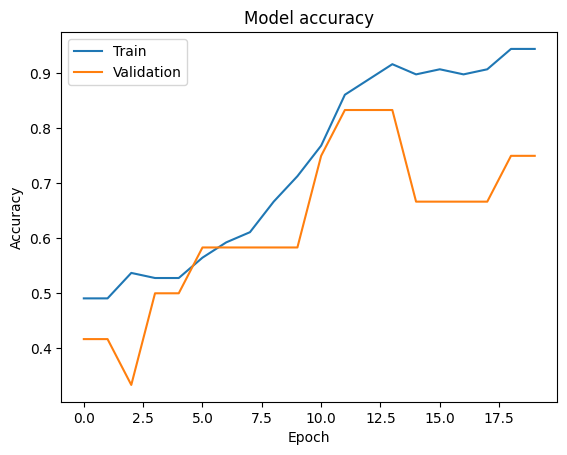

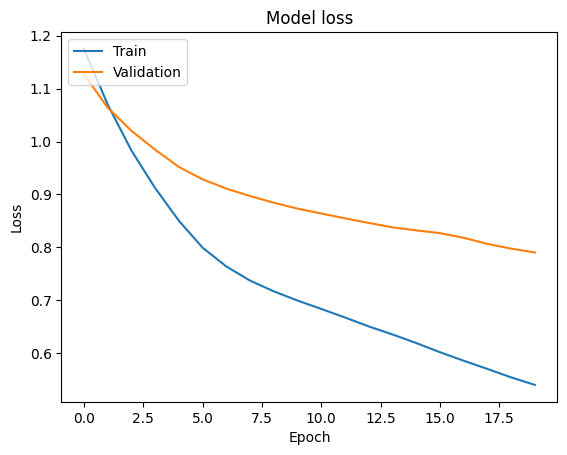

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**8. Evaluate the Model**

In [16]:
# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

Test accuracy: 0.9667
